# Exploratory Data Analysis

In [182]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

file_path = "../data/processed/cleaned_data.csv"

df = pd.read_csv(file_path)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269731 entries, 0 to 269730
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         269731 non-null  int64  
 1   name       269731 non-null  object 
 2   sex        269731 non-null  object 
 3   age        269731 non-null  float64
 4   height_cm  269731 non-null  float64
 5   weight_kg  269731 non-null  float64
 6   team       269731 non-null  object 
 7   noc        269731 non-null  object 
 8   games      269731 non-null  object 
 9   year       269731 non-null  int64  
 10  season     269731 non-null  object 
 11  city       269731 non-null  object 
 12  sport      269731 non-null  object 
 13  event      269731 non-null  object 
 14  medal      269731 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 30.9+ MB


<Axes: xlabel='sport', ylabel='age'>

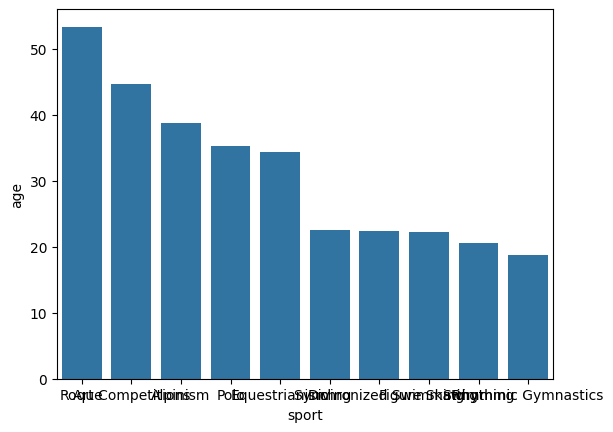

In [48]:
top_5_bottom_5_age_by_sport = pd.concat([age_by_sport.head(), age_by_sport.tail()])

sns.barplot(top_5_bottom_5_age_by_sport)

In [14]:
df["year"].min()

np.int64(1896)

In [17]:
first_year_per_sport = df.groupby("sport").min("year")["year"]
last_year_per_sport = df.groupby("sport").max("year")["year"]
duration_per_sport = (last_year_per_sport - first_year_per_sport).sort_values(ascending=False)
duration_per_sport

# Some sports have only been played once
# Historic sports: 
    # Wrestling, Weightlifting, Shooting, Fencing Cycling, Gymnastics, Swimming, Athletics, etc
    # (Tennis not continuous, upon research)

# Idea: investigate Olympic record progression across historic sports 

sport
Wrestling        120
Weightlifting    120
Shooting         120
Tennis           120
Fencing          120
                ... 
Jeu De Paume       0
Croquet            0
Cricket            0
Basque Pelota      0
Aeronautics        0
Name: year, Length: 66, dtype: int64

In [39]:
years = df["year"].unique()

for year in range(1896, 2020, 4):
    if year not in years:
        print(f"Year missed: {year}")

for year in years:
    if year % 2 != 0:
        print(f"Odd year: {year}")

for i in range(1, len(years)):
    if years[i] - years[i - 1] != 4:
        print(f"Gap devation between: {years[i - 1]} and {years[i]}")

# The gap deviations are a mix of delayed/cancelled winter/summer Olympics and the eventual change of winter Olympics to 2 years apart from summer Olympics 

Year missed: 1916
Year missed: 1940
Year missed: 1944
Gap devation between: 1904 and 1906
Gap devation between: 1906 and 1908
Gap devation between: 1912 and 1920
Gap devation between: 1936 and 1948
Gap devation between: 1992 and 1994
Gap devation between: 1994 and 1996
Gap devation between: 1996 and 1998
Gap devation between: 1998 and 2000
Gap devation between: 2000 and 2002
Gap devation between: 2002 and 2004
Gap devation between: 2004 and 2006
Gap devation between: 2006 and 2008
Gap devation between: 2008 and 2010
Gap devation between: 2010 and 2012
Gap devation between: 2012 and 2014
Gap devation between: 2014 and 2016


In [53]:
df["season"].unique()

array(['Summer', 'Winter'], dtype=object)

In [66]:
sports = df["sport"].unique()
sports.sort()
sports


array(['Aeronautics', 'Alpine Skiing', 'Alpinism', 'Archery',
       'Art Competitions', 'Athletics', 'Badminton', 'Baseball',
       'Basketball', 'Basque Pelota', 'Beach Volleyball', 'Biathlon',
       'Bobsleigh', 'Boxing', 'Canoeing', 'Cricket', 'Croquet',
       'Cross Country Skiing', 'Curling', 'Cycling', 'Diving',
       'Equestrianism', 'Fencing', 'Figure Skating', 'Football',
       'Freestyle Skiing', 'Golf', 'Gymnastics', 'Handball', 'Hockey',
       'Ice Hockey', 'Jeu De Paume', 'Judo', 'Lacrosse', 'Luge',
       'Military Ski Patrol', 'Modern Pentathlon', 'Motorboating',
       'Nordic Combined', 'Polo', 'Racquets', 'Rhythmic Gymnastics',
       'Roque', 'Rowing', 'Rugby', 'Rugby Sevens', 'Sailing', 'Shooting',
       'Short Track Speed Skating', 'Skeleton', 'Ski Jumping',
       'Snowboarding', 'Softball', 'Speed Skating', 'Swimming',
       'Synchronized Swimming', 'Table Tennis', 'Taekwondo', 'Tennis',
       'Trampolining', 'Triathlon', 'Tug-Of-War', 'Volleyball',
   

In [172]:
athletics["event"].unique()

array(["Athletics women's 100 metres",
       "Athletics women's 4 x 100 metres relay",
       "Athletics men's shot put", "Athletics men's pole vault",
       "Athletics men's high jump", "Athletics men's 1,500 metres",
       "Athletics men's 4 x 100 metres relay",
       "Athletics men's long jump", "Athletics women's javelin throw",
       "Athletics men's 5,000 metres", "Athletics women's shot put",
       "Athletics men's 110 metres hurdles", "Athletics women's marathon",
       "Athletics men's 100 metres", "Athletics men's 400 metres hurdles",
       "Athletics men's 400 metres", "Athletics men's hammer throw",
       "Athletics men's 800 metres", "Athletics men's marathon",
       "Athletics men's 4 x 400 metres relay",
       "Athletics men's 10,000 metres", "Athletics women's 3,000 metres",
       "Athletics men's 200 metres", "Athletics men's javelin throw",
       "Athletics men's 3,000 metres steeplechase",
       "Athletics women's 200 metres", "Athletics men's triple ju

In [ ]:
athletics = df[df["sport"] == "Athletics"]
olympic_years = df[df["season"] == "Summer"]["year"].unique()
olympic_years.sort()

ath_100m = athletics[athletics["event"] == "Athletics men's 100 metres"]
gold_ath_100m = ath_100m[ath_100m["medal"] == "Gold"]
for r

,id,name,sex,age,height_cm,weight_kg,team,noc,games,year,season,city,sport,event,medal
915,519,Harold maurice abrahams,M,24.0,183.0,75.0,Great britain,Gbr,1924 summer,1924,Summer,Paris,Athletics,Athletics men's 100 metres,Gold
12631,6890,Donovan bailey,M,28.0,183.0,82.0,Canada,Can,1996 summer,1996,Summer,Atlanta,Athletics,Athletics men's 100 metres,Gold
24754,13029,Usain st. leo bolt,M,21.0,196.0,95.0,Jamaica,Jam,2008 summer,2008,Summer,Beijing,Athletics,Athletics men's 100 metres,Gold
24757,13029,Usain st. leo bolt,M,25.0,196.0,95.0,Jamaica,Jam,2012 summer,2012,Summer,London,Athletics,Athletics men's 100 metres,Gold
24760,13029,Usain st. leo bolt,M,29.0,196.0,95.0,Jamaica,Jam,2016 summer,2016,Summer,Rio de janeiro,Athletics,Athletics men's 100 metres,Gold
26116,13691,Valeriy pylypovych borzov,M,22.0,183.0,80.0,Soviet union,Urs,1972 summer,1972,Summer,Munich,Athletics,Athletics men's 100 metres,Gold
32168,16616,"Thomas edmund ""tom"" burke",M,21.0,183.0,66.0,United states,Usa,1896 summer,1896,Summer,Athina,Athletics,Athletics men's 100 metres,Gold
41135,21313,Linford ecerio christie,M,32.0,189.0,94.0,Great britain,Gbr,1992 summer,1992,Summer,Barcelona,Athletics,Athletics men's 100 metres,Gold
45619,23661,Ralph cook craig,M,22.0,182.0,73.0,United states,Usa,1912 summer,1912,Summer,Stockholm,Athletics,Athletics men's 100 metres,Gold
45718,23711,Hasely joachim crawford,M,25.0,187.0,90.0,Trinidad and tobago,Tto,1976 summer,1976,Summer,Montreal,Athletics,Athletics men's 100 metres,Gold
